## 初始化

In [30]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn import linear_model
from sklearn import datasets
import sklearn

## 广义线性模型


### 普通最小二乘法
LinearRegression 拟合一个带有系数 w = (w_1, ..., w_p) 的线性模型，使得数据集实际观测数据和预测数据（估计值）之间的残差平方和最小。其数学表达式为: 

![](https://img.cntofu.com/book/scikit-learn-doc-zh/docs/img/1b6228a71a038f66ac7b8a2743adf4e7.jpg) 

LinearRegression 会调用 fit 方法来拟合数组 X， y，并且将线性模型的系数 w 存储在其成员变量 coef_ 中。

然而，对于普通最小二乘的系数估计问题，其依赖于模型各项的相互独立性。当各项是相关的，且设计矩阵 X 的各列近似线性相关，那么，设计矩阵会趋向于奇异矩阵，这会导致最小二乘估计对于随机误差非常敏感，产生很大的方差。例如，在没有实验设计的情况下收集到的数据，这种多重共线性（multicollinearity）的情况可能真的会出现。

该方法使用 X 的奇异值分解来计算最小二乘解。如果 X 是一个 size 为 (n, p) 的矩阵，设 n >= p ，则该方法的复杂度为 O(n p^2)

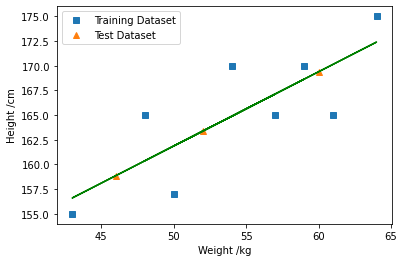

[[0.75141243]]
[124.2980226]
[[163.37146893]
 [169.38276836]
 [158.86299435]]
<bound method RegressorMixin.score of LinearRegression(n_jobs=-1)>


In [31]:
reg = sklearn.linear_model.LinearRegression(fit_intercept=True, normalize=False, copy_X=True, n_jobs=-1)
X_train = np.array([[48], [57], [50], [54], [64], [61], [43], [59]])
Y_train = np.array([[165], [165], [157], [170], [175], [165], [155], [170]])
X_test = np.array([[52], [60], [46]])
X_train.reshape(-1, 1)
Y_train.reshape(-1, 1)
reg.fit(X_train, Y_train)
Y_prediction = reg.predict(X_train)
Y_test = np.array(reg.predict(X_test)).reshape(-1, 1)
#plt.scatter(X_train, Y_train, color = 'black')
#plt.scatter(X_test, Y_test, color = 'blue')
plt.plot(X_train, Y_train, 's', label = "Training Dataset")
plt.plot(X_test, Y_test, '^', label = "Test Dataset")
plt.plot(X_train, Y_prediction, color = 'green')
plt.xlabel('Weight /kg')
plt.ylabel('Height /cm')
plt.legend()
plt.show()
print('reg.coef_: ', reg.coef_)
print('reg.intercept_:', reg.intercept_)
print('reg.predict(X_test): ', reg.predict(X_test))
print('reg.score:', reg.score)

参数详解：

>fit_intercept：默认True，是否计算模型的截距，为False时，则数据中心化处理
>
>normalize：默认False，是否中心化，或者使用sklearn.preprocessing.StandardScaler()
>
>copy_X：默认True，否则X会被改写
>
>n_jobs：默认为1，表示使用CPU的个数。当-1时，代表使用全部CPU

调用方法：

>coef_：训练后的输入端模型系数，如果label有两个，即y值有两列。那么是一个2D的array
>
>intercept_：截距
>
>predict(x)：预测数据
>
>score：评估

### 岭回归
Ridge 回归通过对系数的大小施加惩罚来解决 普通最小二乘法 的一些问题。 岭系数最小化的是带罚项的残差平方和，

![](https://img.cntofu.com/book/scikit-learn-doc-zh/docs/img/c7e49892dca2f0df35d1261a276693f2.jpg)

其中， alpha >= 0 是控制系数收缩量的复杂性参数： alpha 的值越大，收缩量越大，这样系数对共线性的鲁棒性也更强。

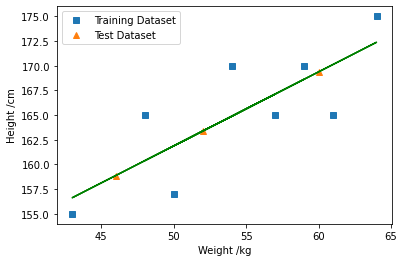

reg.coef_:  [[0.74929577]]
reg.intercept_: [124.41338028]
reg.predict(X_test):  [[163.37676056]
 [169.37112676]
 [158.88098592]]
reg.score: <bound method RegressorMixin.score of Ridge(alpha=1)>


In [40]:
reg = linear_model.Ridge(alpha = 1)
X_train = np.array([[48], [57], [50], [54], [64], [61], [43], [59]])
Y_train = np.array([[165], [165], [157], [170], [175], [165], [155], [170]])
X_test = np.array([[52], [60], [46]])
X_train.reshape(-1, 1)
Y_train.reshape(-1, 1)
reg.fit(X_train, Y_train)
Y_prediction = reg.predict(X_train)
Y_test = np.array(reg.predict(X_test)).reshape(-1, 1)
#plt.scatter(X_train, Y_train, color = 'black')
#plt.scatter(X_test, Y_test, color = 'blue')
plt.plot(X_train, Y_train, 's', label = "Training Dataset")
plt.plot(X_test, Y_test, '^', label = "Test Dataset")
plt.plot(X_train, Y_prediction, color = 'green')
plt.xlabel('Weight /kg')
plt.ylabel('Height /cm')
plt.legend()
plt.show()
print('reg.coef_: ', reg.coef_)
print('reg.intercept_:', reg.intercept_)
print('reg.predict(X_test): ', reg.predict(X_test))
print('reg.score:', reg.score)

### logistic 回归

logistic 回归，虽然名字里有 “回归” 二字，但实际上是解决分类问题的一类线性模型。在某些文献中，logistic 回归又被称作 logit 回归，maximum-entropy classification（MaxEnt，最大熵分类），或 log-linear classifier（对数线性分类器）。该模型利用函数 logistic function 将单次试验（single trial）的可能结果输出为概率。

scikit-learn 中 logistic 回归在 LogisticRegression 类中实现了二分类（binary）、一对多分类（one-vs-rest）及多项式 logistic 回归，并带有可选的 L1 和 L2 正则化。

作为优化问题，带 L2 罚项的二分类 logistic 回归要最小化以下代价函数（cost function）：

![](https://img.cntofu.com/book/scikit-learn-doc-zh/docs/img/203c5a2c58d6567a86dbc86faa92209e.jpg)

类似地，带 L1 正则的 logistic 回归解决的是如下优化问题：

![](https://img.cntofu.com/book/scikit-learn-doc-zh/docs/img/d7ff3091308658ce388554d420581459.jpg)

在 LogisticRegression 类中实现了这些优化算法: “liblinear”， “newton-cg”， “lbfgs”， “sag” 和 “saga”。

“liblinear” 应用了坐标下降算法（Coordinate Descent, CD），并基于 scikit-learn 内附的高性能 C++ 库 LIBLINEAR library 实现。不过 CD 算法训练的模型不是真正意义上的多分类模型，而是基于 “one-vs-rest” 思想分解了这个优化问题，为每个类别都训练了一个二元分类器。因为实现在底层使用该求解器的 LogisticRegression 实例对象表面上看是一个多元分类器。 sklearn.svm.l1_min_c 可以计算使用 L1 罚项时 C 的下界，以避免模型为空（即全部特征分量的权重为零）。

“lbfgs”, “sag” 和 “newton-cg” solvers （求解器）只支持 L2 惩罚项，对某些高维数据收敛更快。这些求解器的参数 [](#id34)multi_class设为 “multinomial” 即可训练一个真正的多项式 logistic 回归 5(#id39) ，其预测的概率比默认的 “one-vs-rest” 设定更为准确。

“sag” 求解器基于平均随机梯度下降算法（Stochastic Average Gradient descent） 6(#id40)。在大数据集上的表现更快，大数据集指样本量大且特征数多。

“saga” 求解器 7(#id41) 是 “sag” 的一类变体，它支持非平滑（non-smooth）的 L1 正则选项 penalty="l1" 。因此对于稀疏多项式 logistic 回归 ，往往选用该求解器。

一言以蔽之，选用求解器可遵循如下规则:


Case              ->              Solver

L1正则          ->                 “liblinear” or “saga”

多项式损失（multinomial loss）  ->   “lbfgs”, “sag”, “saga” or “newton-cg”

大数据集（<cite>n_samples</cite>）-> “sag” or “saga”

-----------------

“saga” 一般都是最佳的选择，但出于一些历史遗留原因默认的是 “liblinear” 。

对于大数据集，还可以用 SGDClassifier ，并使用对数损失（’log’ loss）

### 随机梯度下降， SGD

随机梯度下降(SGD) 是一种简单但又非常高效的方法，主要用于凸损失函数下线性分类器的判别式学习，例如(线性) 支持向量机 和 Logistic 回归 。 尽管 SGD 在机器学习社区已经存在了很长时间, 但是最近在 large-scale learning （大规模学习）方面 SGD 获得了相当大的关注。

SGD 已成功应用于在文本分类和自然语言处理中经常遇到的大规模和稀疏的机器学习问题。对于稀疏数据，本模块的分类器可以轻易的处理超过 105 的训练样本和超过 105 的特征。

Stochastic Gradient Descent （随机梯度下降法）的优势:

>高效。
>
>易于实现 (有大量优化代码的机会)。

Stochastic Gradient Descent （随机梯度下降法）的劣势:

>
>SGD 需要一些超参数，例如 regularization （正则化）参数和 number of iterations （迭代次数）。
>
>SGD 对 feature scaling （特征缩放）敏感。

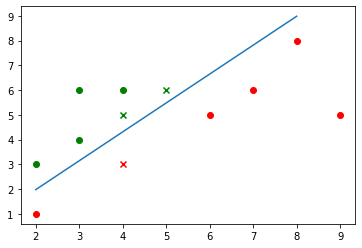

2
9
reg.coef_:  [[ 64.81481481 -55.55555556]]
reg.intercept_: [-19.59862631]
reg.predict(X_test):  [0 1 0]
reg.score: <bound method ClassifierMixin.score of SGDClassifier(max_iter=100)>


In [136]:
reg = sklearn.linear_model.SGDClassifier(loss="hinge", penalty="l2", max_iter=100)
X_train = np.array([[2, 1],[2, 3], [3, 4], [7, 6], [9, 5], [4, 6], [3, 6],[8, 8], [6, 5]])
Y_train = np.array([1, 0, 0, 1, 1, 0, 0, 1, 1])
X_test = np.array([[5, 6], [4, 3], [4, 5]])

reg.fit(X_train, Y_train)

Y_prediction = reg.predict(X_train)
Y_test = np.array(reg.predict(X_test)).reshape(-1, 1)

#plt.scatter(X_train, Y_train, color = 'black')
#plt.scatter(X_test, Y_test, color = 'blue')
for i in range(Y_train.size):
    if Y_train[i] == 1:
        plt.scatter(X_train[i, 0], X_train[i, 1], color = 'red')
    else:
        plt.scatter(X_train[i, 0], X_train[i, 1], color = 'green')

for i in range(X_test.size // 2):
    if X_test[i, 0] > X_test[i, 1]:
        plt.scatter(X_test[i, 0], X_test[i, 1], marker = 'x', color = 'red')
    else:
        plt.scatter(X_test[i, 0], X_test[i, 1], marker = 'x', color = 'green')

#plt.plot(X_train, Y_prediction, color = 'green')
plt.plot(np.arange(np.nanmin(X_train[:, 0]), np.nanmax(X_train[:, 0])).reshape(-1, 1), -(np.arange(np.nanmin(X_train[:, 0]), np.nanmax(X_train[:, 0])).reshape(-1, 1).reshape(-1, 1) * reg.coef_[0, 0] + reg.intercept_) / reg.coef_[0, 1])
#plt.legend()
plt.show()
print(np.nanmin(X_train[:, 0]))
print(np.nanmax(X_train[:, 0]))
print('reg.coef_: ', reg.coef_)
print('reg.intercept_:', reg.intercept_)
print('reg.predict(X_test): ', reg.predict(X_test))
print('reg.score:', reg.score)

In [66]:
reg.predict([[2, 2]])
reg.predict([[1, 1], [2, 1], [8, 9]])

array([0, 1, 0])

### Perceptron（感知器）

Perceptron 是适用于大规模学习的一种简单算法。默认情况下：

>不需要设置学习率（learning rate）。
>
>不需要正则化处理。
>
>仅使用错误样本更新模型。

最后一点表明使用合页损失（hinge loss）的感知机比 SGD 略快，所得模型更稀疏。

In [94]:

import numpy as np
from numpy import random as rd
x = rd.randint(-5,5,(5,5))
y = x==3 #得到boolean矩阵
z = x[y]
print(x)
print(y)
print(z)
print (x.size)
print (x[x==3])

[[ 1 -3  0 -3  2]
 [ 3 -4 -5  4 -4]
 [-1  3  0 -5 -3]
 [ 0 -5 -3  3 -2]
 [-4  1 -4 -3  2]]
[[False False False False False]
 [ True False False False False]
 [False  True False False False]
 [False False False  True False]
 [False False False False False]]
[3 3 3]
25
[3 3 3]
